#Movie Recommendation System



---



##Importing Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from pprint import pprint

##Data Preprocessing

####Importing Data and preparing Datasets

In [2]:
ratings_dataset_df = pd.read_csv('u.data', sep='\t', header=None) #importing the movie rating dataset
ratings_dataset_df.columns = ['user id','movie id','rating','timestamp']
ratings_dataset_df.head() #printing first 5 rows of the data set

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [46]:
ratings_dataset_df.info() #printing the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [3]:
column_names_items = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names_item_dataset = column_names_items.split(' | ')
print(column_names_item_dataset)

['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [4]:
items_dataset_df = pd.read_csv('u.item', sep='|',header=None,names=column_names_item_dataset,encoding='latin-1') #importing the movie-genre dataset
items_dataset_df.head() #to display first 5 rows of the data

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
items_dataset_df.info() # to display the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [5]:
movie_dataset_df = items_dataset_df[['movie id','movie title', 'Action','Adventure', 'Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
movie_dataset_df.head()

,movie id,movie title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Checking for null values

In [44]:
ratings_dataset_df.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [45]:
movie_dataset_df.isnull().sum()

movie id       0
movie title    0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

Joining the datasets using pd.merge.
Here we are performing innner join on movie id

In [6]:
combined_dataset_df = pd.merge(ratings_dataset_df, movie_dataset_df, how='inner', on='movie id')
combined_dataset_df.head()

,user id,movie id,rating,timestamp,movie title,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
final_dataset = combined_dataset_df
final_dataset.head() #display first 5 rows of the final dataset

,user id,movie id,rating,timestamp,movie title,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


---

####Top Rated Movies form the data

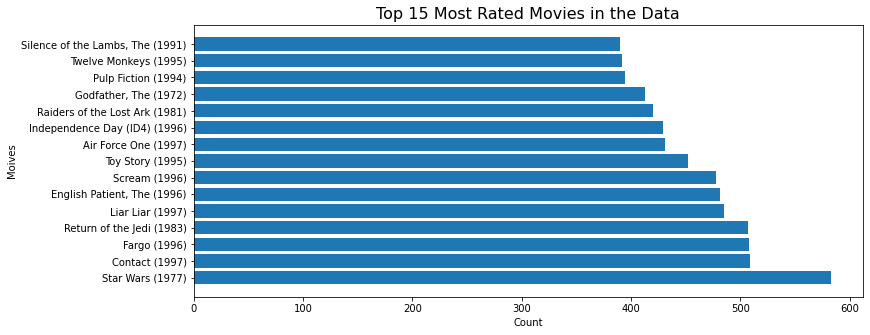

In [53]:
top_movies = final_dataset.groupby("movie title").size().sort_values(ascending=False)[:15]

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_movies.index,
         width= top_movies.values)
plt.title("Top 15 Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Moives")
plt.xlabel("Count")
plt.show()

####Least Rated Movies

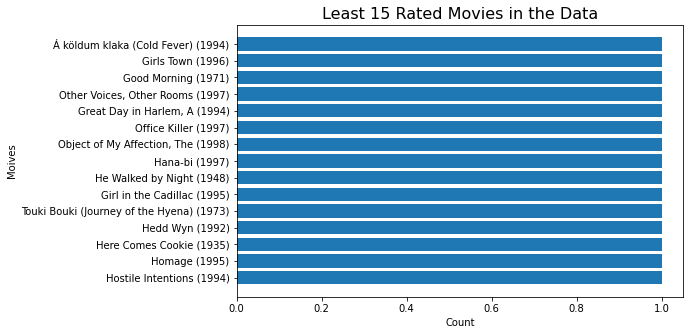

In [60]:
# the least rated movies 
least_movies = final_dataset.groupby("movie title").size().sort_values(ascending=False)[-15:]
# plot the counts
plt.figure(figsize=(8, 5))
plt.barh(y= least_movies.index,
         width= least_movies.values)
plt.title("Least 15 Rated Movies in the Data", fontsize=16)
plt.ylabel("Moives")
plt.xlabel("Count")
plt.show()


####No. of movies produced each year

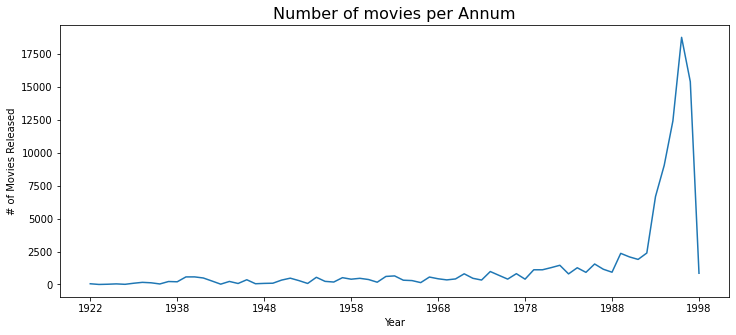

In [57]:
# creating year column from Movie title 
final_dataset["year"] = final_dataset["movie title"].str.extract("\((\d{4})\)", expand=True)
# return rows by the year 
year_counts = final_dataset[["movie title", "year"]].groupby("year").size()

fig, ax = plt.subplots(figsize=(12, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year")
plt.ylabel("# of Movies Released")
plt.show()

####Most Popular Genres

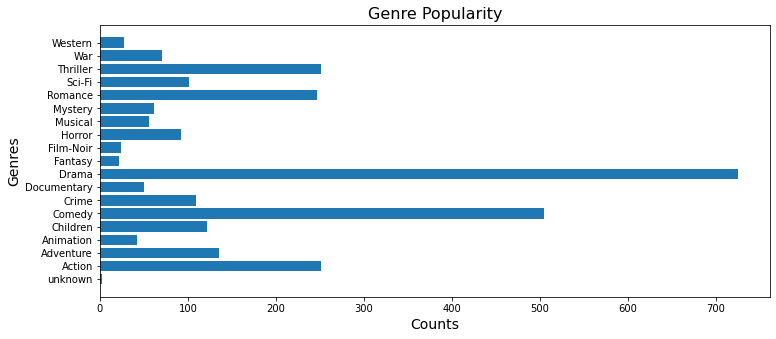

In [59]:
feature_names=['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
# get the genre names in the dataframe and their counts
label= items_dataset_df.loc[:, "unknown":].sum().index
label_counts= items_dataset_df.loc[:, "unknown":].sum().values
# plot a bar chart
plt.figure(figsize=(12, 5))
plt.barh(y= label, width= label_counts)
plt.title("Genre Popularity", fontsize=16)
plt.ylabel("Genres", fontsize=14)
plt.xlabel("Counts", fontsize=14)
plt.show()

---

##Preparing Input Data

####Using LabelEncoder for user, movie and rating

In [8]:
user_enc = LabelEncoder()
final_dataset['user'] = user_enc.fit_transform(final_dataset['user id'].values)
n_users = final_dataset['user'].nunique()
print(n_users)

943


In [9]:
item_enc = LabelEncoder()
final_dataset['movie'] = item_enc.fit_transform(final_dataset['movie title'].values)
n_movies = final_dataset['movie'].nunique()
print(n_movies)

1664


In [10]:
final_dataset['rating'] = final_dataset['rating'].values.astype(np.float32)
min_rating = min(final_dataset['rating'])
max_rating = max(final_dataset['rating'])
print(min_rating)
print(max_rating)

1.0
5.0


####Preparing x,y values for the model. Here, we are taking 81:09:10 Train:Validation:Test Split

In [11]:
X = final_dataset[['user', 'movie','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].values
num_features = X.shape[1] - 2
y = final_dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=50)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((81000, 20), (9000, 20), (10000, 20), (81000,), (9000,), (10000,))

####Reshaping the inputs to fit into the model

In [12]:
X_train_array = [X_train[:, 0], X_train[:, 1], X_train[:, 2:]]
X_val_array = [X_val[:, 0], X_val[:, 1],  X_val[:, 2:]]
X_test_array = [X_test[:, 0], X_test[:, 1],  X_test[:, 2:]]


In [13]:
X_train_array[2].shape


(81000, 18)

In [14]:
num_features

18

In [15]:
y_train = (y_train - min_rating)/(max_rating - min_rating)
y_val = (y_val - min_rating)/(max_rating - min_rating)
y_test = (y_test - min_rating)/(max_rating - min_rating)

##Creating the Model

In [38]:
class RecommenderSystem():
  def __init__(self, embed_dim, n_users, n_movies, num_features): #constructor for embedded dimenstions, users, movies, num_features
    self.embed_dim = embed_dim
    self.n_users = n_users
    self.n_movies = n_movies
    self.num_features = num_features

  def set_model(self): #model definition
    user = tf.keras.layers.Input(shape = (1,)) #input layer #1 user
    movie = tf.keras.layers.Input(shape = (1,))  #input layer #2 movie
    movie_features = tf.keras.layers.Input(shape = (num_features,)) #input layer #3 movie features

    embed_user = keras.layers.embeddings.Embedding(n_users, embed_dim, embeddings_regularizer = tf.keras.regularizers.l2(1e-3))(user)
    embed_user = tf.keras.layers.Reshape((embed_dim ,))(embed_user) #embedding for users

    embed_movie = keras.layers.embeddings.Embedding(n_movies, embed_dim, embeddings_regularizer=tf.keras.regularizers.l2(1e-3))(movie)
    embed_movie = tf.keras.layers.Reshape((embed_dim,))(embed_movie) #embedding for movie

    embed_movie_features = tf.keras.layers.Dense(embed_dim)(movie_features) #embedding for movie features

    x = tf.keras.layers.Concatenate()([embed_user,embed_movie,embed_movie_features]) #combining the embedding layers
    x = tf.keras.layers.Dropout(0.05)(x)  #adding dropout layer 5%

    x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x) #adding dense layer
    x = tf.keras.layers.Activation(activation='relu')(x) #using relu activation function
    x = tf.keras.layers.Dropout(0.05)(x) #adding dropoutlayer 5%

    x = tf.keras.layers.Dense(5)(x)
    x = tf.keras.layers.Activation(activation='softmax')(x) #softmax activation for output layer

    self.model = tf.keras.models.Model(inputs=[user,movie, movie_features], outputs=x)

    self.model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy']) #model compile
    print(self.model.summary()) #printing model summary
    return self

  def predict_recommendation(self, user_id, n_movies):
    encoded_user_id = user_enc.transform([user_id]) #input transform
    seen_movies = list(final_dataset[final_dataset['user id'] == user_id]['movie']) #list of seen movies
    unseen_movies = [i for i in range(min(final_dataset['movie']), max(final_dataset['movie'])+1) if i not in seen_movies] #list of unseen moces
    unseen_movies_features = np.empty((0, num_features))
    feature_names=['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
    for i in unseen_movies:
      unseen_movies_features = np.append(unseen_movies_features, np.array(final_dataset.loc[final_dataset['movie'] == i ,  feature_names].iloc[0]).reshape(1, num_features), axis=0)
    model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies),np.asarray(unseen_movies_features)] #preparing the model input
    predicted_ratings = self.model.predict(model_input) #model predict
    predicted_ratings = np.max(predicted_ratings, axis=1) #predicted ratings
    sorted_index = np.argsort(predicted_ratings)[::-1] #sorting the index of the predicted ratings
    recommended_movies = item_enc.inverse_transform(sorted_index) #reccommended movies in the sorting order
    print("---------------------------------------------------------------------------------")
    print("Top "+str(n_movies)+" Movie recommendations for the User "+str(user_id)+ " are:")
    pprint(list(recommended_movies[:n_movies]))


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_26 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_16 (Embedding)       (None, 1, 256)       241408      ['input_25[0][0]']               
                                                                                                  
 embedding_17 (Embedding)       (None, 1, 256)       2560        ['input_26[0][0]']               
                                                                                            

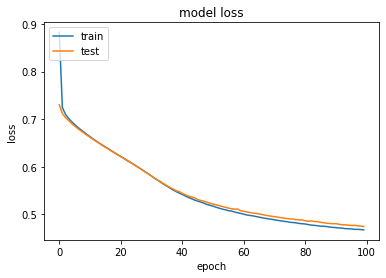

In [61]:
embed_dim = 256
rec_sys = RecommenderSystem(embed_dim, n_users, n_movies, num_features) #creating the model object
rec_sys.set_model()  #initializing the model
history = rec_sys.model.fit(x = X_train_array, y = y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_val_array, y_val),shuffle=True) #training the model with X_train and y_train (x_val_array,y_val is the validation dataset)


#plotting Training Loss vs Validation Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


In [47]:
print("Enter user id")
user_id= int(input())

print("Enter number of movies to be recommended:")
n_movies = int(input())
rec_sys.predict_recommendation(user_id, n_movies)

Enter user id
198
Enter number of movies to be recommended:
10
---------------------------------------------------------------------------------
Top 10 Movie recommendations for the User 198 are:
['M*A*S*H (1970)',
 'Faust (1994)',
 'Goofy Movie, A (1995)',
 'Ghost in the Shell (Kokaku kidotai) (1995)',
 'Raise the Red Lantern (1991)',
 'Sling Blade (1996)',
 'Celluloid Closet, The (1995)',
 'Bad Company (1995)',
 'Bad Boys (1995)',
 'Gattaca (1997)']


In [62]:
print("Enter user id")
user_id= int(input())

print("Enter number of movies to be recommended:")
n_movies = int(input())
rec_sys.predict_recommendation(user_id, n_movies)

Enter user id
190
Enter number of movies to be recommended:
10
---------------------------------------------------------------------------------
Top 10 Movie recommendations for the User 190 are:
['Nothing to Lose (1994)',
 'Twelve Monkeys (1995)',
 'I Like It Like That (1994)',
 'Eddie (1996)',
 'Jerky Boys, The (1994)',
 'Fifth Element, The (1997)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 'Mary Poppins (1964)',
 'Murder at 1600 (1997)',
 'Scream (1996)']
